In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
im = cv2.imread("end_of_the_road_hw1.jpg",0)
im_pad = cv2.copyMakeBorder(im, 1, 1, 1, 1,cv2.BORDER_CONSTANT,0)
im_pad

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 132, 132, ...,   5,   5,   0],
       [  0, 132, 132, ...,   5,   5,   0],
       ...,
       [  0,  40,  41, ...,  13,  13,   0],
       [  0,  44,  47, ...,  12,  12,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

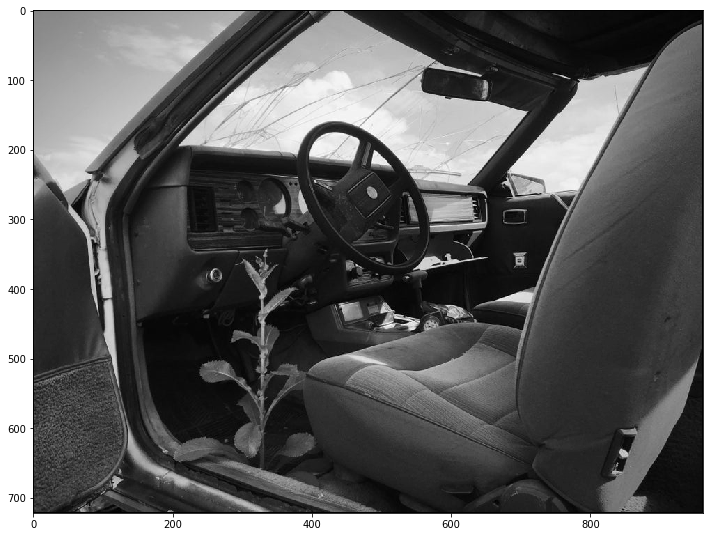

In [3]:
plt.figure(figsize=(12,10))
plt.imshow(im_pad, cmap = "gray")

In [4]:
flt = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
flt

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [5]:
im_conv = np.zeros((720,960))
for i in range(im.shape[0]-1):
    for j in range(im.shape[1]-1):
        conv_sections = np.array([
            [np.int(im_pad[i][j]), np.int(im_pad[i][j+1]), np.int(im_pad[i][j+2])],
            [np.int(im_pad[i+1][j]), np.int(im_pad[i+1][j+1]), np.int(im_pad[i+1][j+2])],
            [np.int(im_pad[i+2][j]), np.int(im_pad[i+2][j+1]), np.int(im_pad[i+2][j+2])],
        ])
        im_conv[i][j] = np.int((conv_sections*flt).sum())
im_conv

array([[-264.,    0.,    0., ...,    2.,    2.,    0.],
       [-397.,    0.,    0., ...,    3.,    3.,    0.],
       [-398.,    0.,    0., ...,    3.,    3.,    0.],
       ...,
       [-132.,    6.,  -56., ...,    0.,    0.,    0.],
       [-130.,    3.,  -31., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

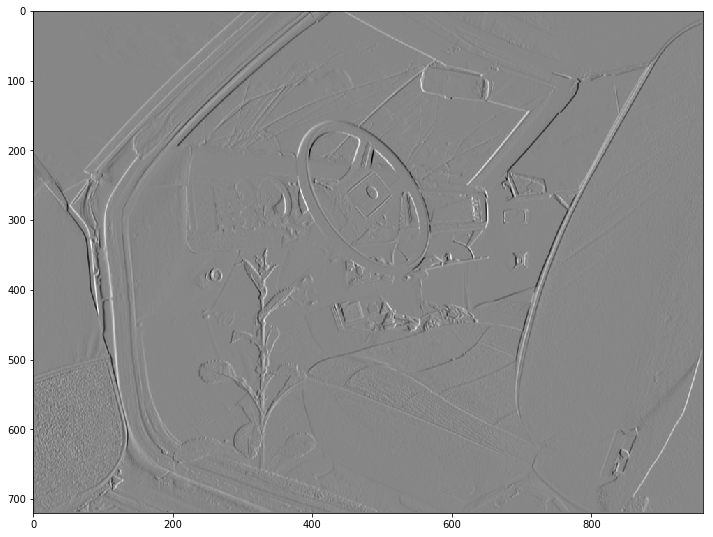

In [6]:
plt.figure(figsize=(12,10))
plt.imshow(im_conv, cmap = "gray")

In [7]:
cv2.imwrite("im_conv.png",im_conv)

True